In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [2]:
hr=pd.read_csv("hrattrition.csv")
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# DATA ANALYSIS

In [3]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
hr.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [6]:
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# FEATURE ENGINEERING

In [8]:
from sklearn .preprocessing import LabelEncoder
le=LabelEncoder()
le_count=0
for col in hr.columns[1:]:
   if hr[col].dtype=='object':
    if len(list(hr[col].unique()))<=2:
        le.fit(hr[col])
        hr[col]=le.transform(hr[col])
        le_count +=1
print('{} columns were label encoded.',format(le_count))

{} columns were label encoded. 4


In [9]:
hr=pd.get_dummies(hr)

In [10]:
hr.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,1,61,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,...,1,0,0,0,0,0,0,0,1,0


In [11]:
hr.isnull().sum()

Age                                  0
Attrition                            0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EmployeeCount                        0
EmployeeNumber                       0
EnvironmentSatisfaction              0
Gender                               0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
Over18                               0
OverTime                             0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StandardHours                        0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance          

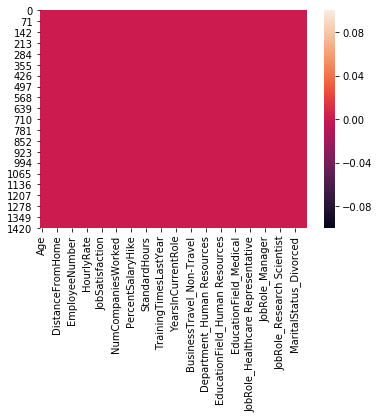

In [12]:
sns.heatmap(hr.isnull())

# VISUALIZATION

# Univariate Analysis

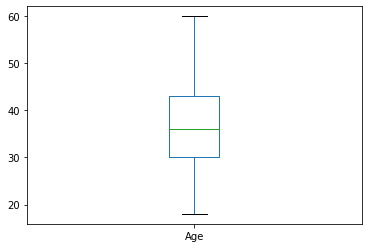

In [13]:
hr["Age"].plot.box()

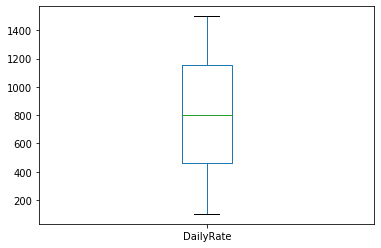

In [16]:
hr["DailyRate"].plot.box()

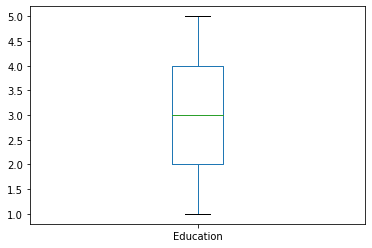

In [20]:
hr["Education"].plot.box()

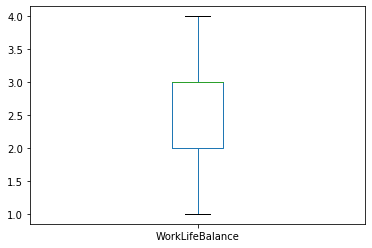

In [21]:
hr["WorkLifeBalance"].plot.box()

In [23]:
#Using MinMaxScaler to shrinks the range
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
hr=scaler.fit_transform(hr.astype(float))
hr

array([[0.54761905, 1.        , 0.71581961, ..., 0.        , 0.        ,
        1.        ],
       [0.73809524, 0.        , 0.12670007, ..., 0.        , 1.        ,
        0.        ],
       [0.45238095, 1.        , 0.90980673, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.21428571, 0.        , 0.03793844, ..., 0.        , 1.        ,
        0.        ],
       [0.73809524, 0.        , 0.65926986, ..., 0.        , 1.        ,
        0.        ],
       [0.38095238, 0.        , 0.37652112, ..., 0.        , 1.        ,
        0.        ]])

In [24]:
hf=pd.DataFrame(hr)
hf

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.547619,1.0,0.715820,0.000000,0.25,0.0,0.000000,0.333333,0.0,0.914286,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.738095,0.0,0.126700,0.250000,0.00,0.0,0.000484,0.666667,1.0,0.442857,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.452381,1.0,0.909807,0.035714,0.25,0.0,0.001451,1.000000,1.0,0.885714,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0.0,0.923407,0.071429,0.75,0.0,0.001935,1.000000,0.0,0.371429,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.214286,0.0,0.350036,0.035714,0.00,0.0,0.002903,0.000000,1.0,0.142857,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.0,0.559771,0.785714,0.25,0.0,0.996613,0.666667,1.0,0.157143,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.500000,0.0,0.365784,0.178571,0.00,0.0,0.997097,1.000000,1.0,0.171429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.214286,0.0,0.037938,0.107143,0.50,0.0,0.998065,0.333333,1.0,0.814286,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.738095,0.0,0.659270,0.035714,0.50,0.0,0.998549,1.000000,1.0,0.471429,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [25]:
hf.corr()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,-0.036311,0.024287,...,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.033120,0.083919,-0.119185
1,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,0.029453,-0.006846,...,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.087716,-0.090984,0.175419
2,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,-0.011716,0.023381,...,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375,0.037080,0.040035,-0.075835
3,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,-0.001851,0.031131,...,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994,-0.005440,0.030232,-0.027445
4,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,-0.016547,0.016775,...,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.002439,-0.001865,0.004168
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.022556,0.035179,...,-0.019722,-0.035058,-0.014350,-0.013983,-0.017686,0.023263,0.006255,-0.025149,0.053933,-0.035189
7,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,0.000508,-0.049857,...,-0.001533,0.010730,0.059178,-0.048689,0.001940,-0.024421,0.002949,0.016439,-0.022180,0.009035
8,-0.036311,0.029453,-0.011716,-0.001851,-0.016547,NaN,0.022556,0.000508,1.000000,-0.000478,...,0.067793,-0.033880,-0.065197,-0.006121,0.009745,-0.005348,-0.028877,0.046076,-0.007804,-0.032752
9,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,-0.000478,1.000000,...,0.018028,0.012659,-0.014394,-0.025128,0.020034,-0.011886,-0.018703,-0.006150,0.036432,-0.033436


In [29]:
#Model Building- as attrition is on column 1, so making it as Target.
x=hf.drop(1,axis=1)
x

,0,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
0,0.547619,0.715820,0.000000,0.25,0.0,0.000000,0.333333,0.0,0.914286,0.666667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.0,0.000484,0.666667,1.0,0.442857,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,0.0,0.001451,1.000000,1.0,0.885714,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,0.0,0.001935,1.000000,0.0,0.371429,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.214286,0.350036,0.035714,0.00,0.0,0.002903,0.000000,1.0,0.142857,0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.785714,0.25,0.0,0.996613,0.666667,1.0,0.157143,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.500000,0.365784,0.178571,0.00,0.0,0.997097,1.000000,1.0,0.171429,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.214286,0.037938,0.107143,0.50,0.0,0.998065,0.333333,1.0,0.814286,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.738095,0.659270,0.035714,0.50,0.0,0.998549,1.000000,1.0,0.471429,0.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [28]:
y=hf[1]
y

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1465    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: 1, Length: 1470, dtype: float64

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=21)

In [71]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1161, 53)
(309, 53)
(1161,)
(309,)


In [72]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# APPLYING ALGORITHMS

In [73]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.9061488673139159
[[256   4]
 [ 25  24]]
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95       260
         1.0       0.86      0.49      0.62        49

    accuracy                           0.91       309
   macro avg       0.88      0.74      0.78       309
weighted avg       0.90      0.91      0.90       309



In [51]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.8705501618122977
[[256   4]
 [ 36  13]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       260
         1.0       0.76      0.27      0.39        49

    accuracy                           0.87       309
   macro avg       0.82      0.62      0.66       309
weighted avg       0.86      0.87      0.84       309



In [52]:
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8414239482200647
[[260   0]
 [ 49   0]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       260
         1.0       0.00      0.00      0.00        49

    accuracy                           0.84       309
   macro avg       0.42      0.50      0.46       309
weighted avg       0.71      0.84      0.77       309



In [53]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7702265372168284
[[218  42]
 [ 29  20]]
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86       260
         1.0       0.32      0.41      0.36        49

    accuracy                           0.77       309
   macro avg       0.60      0.62      0.61       309
weighted avg       0.79      0.77      0.78       309



In [54]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8414239482200647
[[255   5]
 [ 44   5]]
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       260
         1.0       0.50      0.10      0.17        49

    accuracy                           0.84       309
   macro avg       0.68      0.54      0.54       309
weighted avg       0.80      0.84      0.79       309



In [55]:
#ROC CURVE
from sklearn.metrics import roc_curve

In [56]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([1.43675814e-01, 2.42181430e-02, 5.89720605e-02, 1.34778146e-01,
       4.73565453e-02, 1.92830835e-02, 2.22807304e-01, 2.73450047e-02,
       1.42997262e-01, 3.13127458e-01, 3.05924396e-01, 7.43166241e-03,
       2.56883088e-01, 2.15420041e-02, 3.18730123e-02, 6.50203485e-02,
       1.22677199e-01, 2.72810096e-01, 7.74558134e-02, 2.30106618e-01,
       1.34576403e-01, 6.85345014e-02, 2.13944996e-02, 1.58156029e-02,
       1.30809247e-01, 3.44447546e-02, 5.12750266e-02, 1.30195264e-01,
       3.01844190e-03, 2.39165319e-02, 4.63792961e-02, 8.93872041e-01,
       1.99975802e-02, 1.19679989e-02, 1.24527926e-01, 3.45100929e-01,
       9.20975683e-02, 4.61113178e-01, 2.54959513e-01, 2.09980093e-01,
       4.26551226e-01, 1.40410780e-01, 1.24689610e-02, 7.58874941e-02,
       9.74637553e-02, 5.10831668e-01, 9.99173230e-03, 1.84528200e-01,
       2.50440524e-01, 1.84991761e-01, 3.93102438e-01, 1.13383468e-01,
       3.51905606e-01, 3.71383195e-01, 9.78429294e-03, 2.74514989e-02,
      

In [57]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [58]:
fpr

array([0.        , 0.        , 0.        , 0.00384615, 0.00384615,
       0.00769231, 0.00769231, 0.01153846, 0.01153846, 0.01538462,
       0.01538462, 0.02307692, 0.02307692, 0.02692308, 0.02692308,
       0.03076923, 0.03076923, 0.08076923, 0.08076923, 0.08846154,
       0.08846154, 0.09615385, 0.09615385, 0.10384615, 0.10384615,
       0.16538462, 0.16538462, 0.18076923, 0.18076923, 0.19615385,
       0.19615385, 0.21538462, 0.21538462, 0.37307692, 0.37307692,
       0.41153846, 0.41153846, 0.57692308, 0.57692308, 0.58076923,
       0.58076923, 0.64230769, 0.64230769, 0.86538462, 0.86538462,
       0.91538462, 0.91538462, 0.92692308, 0.92692308, 1.        ])

In [60]:
tpr

array([0.        , 0.02040816, 0.24489796, 0.24489796, 0.28571429,
       0.28571429, 0.30612245, 0.30612245, 0.42857143, 0.42857143,
       0.51020408, 0.51020408, 0.53061224, 0.53061224, 0.55102041,
       0.55102041, 0.57142857, 0.57142857, 0.59183673, 0.59183673,
       0.65306122, 0.65306122, 0.69387755, 0.69387755, 0.71428571,
       0.71428571, 0.73469388, 0.73469388, 0.7755102 , 0.7755102 ,
       0.81632653, 0.81632653, 0.83673469, 0.83673469, 0.85714286,
       0.85714286, 0.87755102, 0.87755102, 0.89795918, 0.89795918,
       0.91836735, 0.91836735, 0.93877551, 0.93877551, 0.95918367,
       0.95918367, 0.97959184, 0.97959184, 1.        , 1.        ])

In [62]:
thresholds

array([1.92075241e+00, 9.20752414e-01, 6.47869296e-01, 6.33467107e-01,
       6.24359192e-01, 6.13559137e-01, 6.02674941e-01, 5.83992859e-01,
       5.25424561e-01, 5.19255635e-01, 4.81151991e-01, 4.73225526e-01,
       4.72964150e-01, 4.70999183e-01, 4.61113178e-01, 4.60218989e-01,
       4.51394082e-01, 3.71383195e-01, 3.65373118e-01, 3.45100929e-01,
       3.13127458e-01, 3.07374692e-01, 3.00050221e-01, 2.79889220e-01,
       2.72810096e-01, 2.19195747e-01, 2.17475467e-01, 2.06597386e-01,
       2.03083309e-01, 1.95209091e-01, 1.88208620e-01, 1.81885713e-01,
       1.78351829e-01, 1.21296721e-01, 1.18784689e-01, 9.67853152e-02,
       9.58714701e-02, 5.29869107e-02, 5.12774720e-02, 5.12750266e-02,
       5.10257643e-02, 3.97233191e-02, 3.97034505e-02, 1.25221143e-02,
       1.24689610e-02, 9.26513200e-03, 8.63808985e-03, 8.32154261e-03,
       8.03863529e-03, 8.56173381e-04])

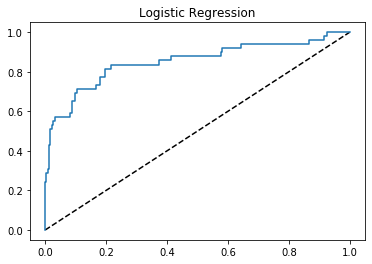

In [63]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="LogisticRegression")
plt.title("Logistic Regression")
plt.show()

In [64]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print(auc_score)

0.7372056514913659


In [65]:
#Saving the Model
from sklearn.externals import joblib
joblib.dump(lg,"HR_Analytics.pkl")

['HR_Analytics.pkl']